<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W6D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from scipy.stats import pearsonr

In [19]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

In [3]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})
ninja_data

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754
...,...,...,...,...
995,99.5996,20.080659,1033.072439,5.164919
996,99.6997,19.806464,1034.387284,4.630102
997,99.7998,19.984203,1033.152105,4.835813
998,99.8999,19.394747,1031.856516,4.694612


In [4]:
#Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
# Calculate mean and standard deviation for each variable
mean_values = ninja_data.mean()
std_values = ninja_data.std()
# Normalize the data
normalized_data = (ninja_data - mean_values) / std_values
# Display the first few rows of normalized data
print(normalized_data.head())

       Time  Temperature  Pressure  Chemical Concentration
0 -1.729454     0.253054  1.444895               -0.206291
1 -1.725992     0.071093  1.468476               -0.187444
2 -1.722530     0.160811  1.375573                0.101064
3 -1.719067     0.346135  1.412122                0.004856
4 -1.715605     0.302714  1.420026                0.170552


In [6]:
# Apply logarithmic scaling
log_scaled_data = np.log(ninja_data)

# Display the first few rows of log-scaled data
print(log_scaled_data.head())

       Time  Temperature  Pressure  Chemical Concentration
0      -inf     3.038889  6.940761                1.546161
1 -2.301585     3.007242  6.941085                1.551913
2 -1.608437     3.022971  6.939807                1.636067
3 -1.202972     3.054698  6.940310                1.608784
4 -0.915290     3.047354  6.940419                1.655320


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [7]:
# Add a small positive value to avoid taking the logarithm of zero or negative numbers
ninja_data['Time'] = ninja_data['Time'] + 1e-10  # Adding a small epsilon value

# Apply logarithmic scaling
log_scaled_data = np.log(ninja_data)

# Display the first few rows of the log-scaled data
print(log_scaled_data.head())

        Time  Temperature  Pressure  Chemical Concentration
0 -23.025851     3.038889  6.940761                1.546161
1  -2.301585     3.007242  6.941085                1.551913
2  -1.608437     3.022971  6.939807                1.636067
3  -1.202972     3.054698  6.940310                1.608784
4  -0.915290     3.047354  6.940419                1.655320


In [9]:
# Fourier Transformation
fourier_transformed_data = np.fft.fft(ninja_data)

# Display the first few rows of the Fourier transformed data
print(fourier_transformed_data[:5])

[[ 1059.13140464 +0.j         -1033.55596268-16.18861038j
   1007.98052072 +0.j         -1033.55596268+16.18861038j]
 [ 1058.94300783 +0.j         -1033.79079151-15.51103542j
   1009.03897559 +0.j         -1033.79079151+15.51103542j]
 [ 1058.45875218 +0.j         -1032.37115611-15.41732849j
   1007.08436084 +0.j         -1032.37115611+15.41732849j]
 [ 1059.60228802 +0.j         -1032.79017472-16.21805355j
   1007.17926262 +0.j         -1032.79017472+16.21805355j]
 [ 1059.89745123 +0.j         -1032.80234147-15.82480148j
   1007.30883331 +0.j         -1032.80234147+15.82480148j]]


In [10]:
#2. Statistical Analysis
# Descriptive Statistics
descriptive_stats = normalized_data.describe()

# Display descriptive statistics
print(descriptive_stats)

               Time   Temperature      Pressure  Chemical Concentration
count  1.000000e+03  1.000000e+03  1.000000e+03            1.000000e+03
mean   5.684342e-17  2.273737e-16 -2.842171e-17           -4.121148e-16
std    1.000000e+00  1.000000e+00  1.000000e+00            1.000000e+00
min   -1.729454e+00 -1.700716e+00 -1.601678e+00           -1.691915e+00
25%   -8.647271e-01 -1.004320e+00 -9.984525e-01           -9.841460e-01
50%    1.229485e-16  8.753899e-03 -5.819063e-03           -1.307186e-02
75%    8.647271e-01  1.005051e+00  9.876893e-01            9.803748e-01
max    1.729454e+00  1.693152e+00  1.579772e+00            1.738253e+00


we can see the mean is close to zero for each variable, and the standard deviation is approximately 1, indicating successful normalization. Additionally, we can observe the range of values for each variable, along with percentiles such as quartiles.

In [11]:
# Correlation Analysis
correlation_matrix = normalized_data.corr()

# Display correlation matrix
print(correlation_matrix)

                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   

                        Chemical Concentration  
Time                                 -0.156113  
Temperature                          -0.003277  
Pressure                             -0.000863  
Chemical Concentration                1.000000  


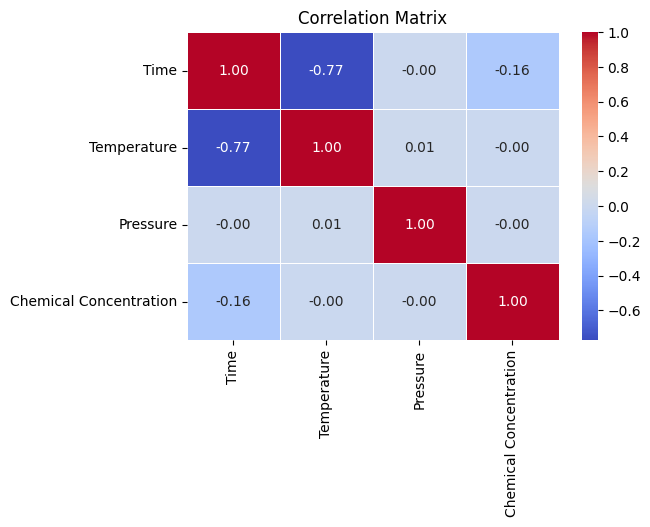

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and show plot
plt.title('Correlation Matrix')
plt.show()

There is a strong negative correlation (-0.77) between 'Time' and 'Temperature', indicating that as time increases, temperature tends to decrease.


The correlations between other pairs of variables ('Pressure' and 'Temperature', 'Pressure' and 'Time', 'Chemical Concentration' and 'Time') are close to zero, suggesting weak linear relationships between these variables.

In [18]:
# Calculate Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(normalized_data['Time'], normalized_data['Temperature'])

# Display results
print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)

Pearson correlation coefficient: -0.7706960694253784
P-value: 1.528594087050225e-197


The Pearson correlation coefficient between 'Time' and 'Temperature' is approximately -0.771, indicating a strong negative linear relationship between these variables. This means that as time increases, temperature tends to decrease.

The associated p-value is extremely small (approximately
1.528594087050225e-197
 ), suggesting strong evidence against the null hypothesis of no correlation. Therefore, we can conclude that the correlation between 'Time' and 'Temperature' is statistically significant.

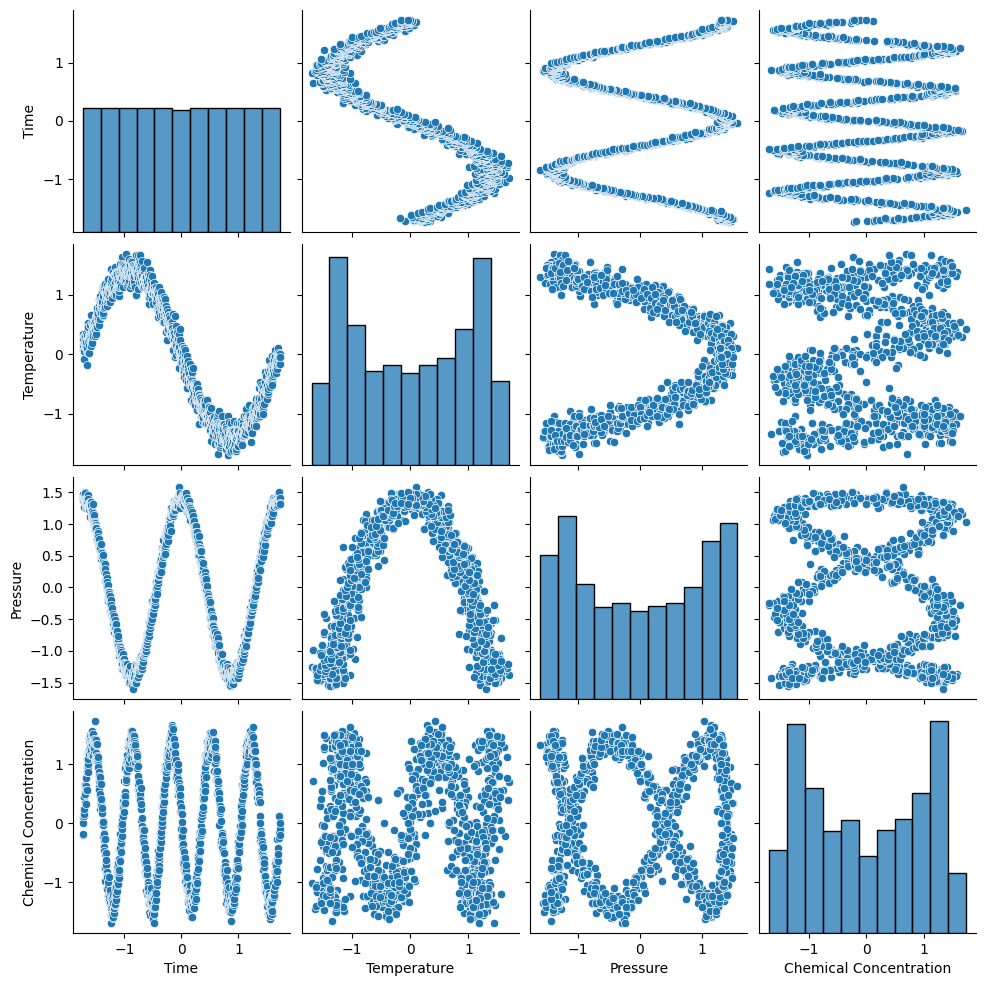

In [20]:
# Create pairplot
sns.pairplot(normalized_data)
plt.show()

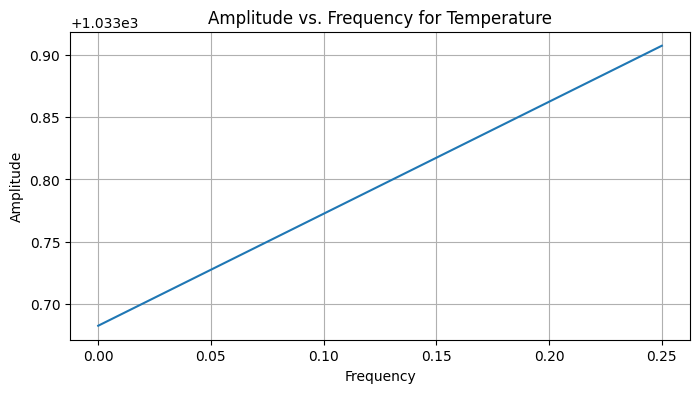

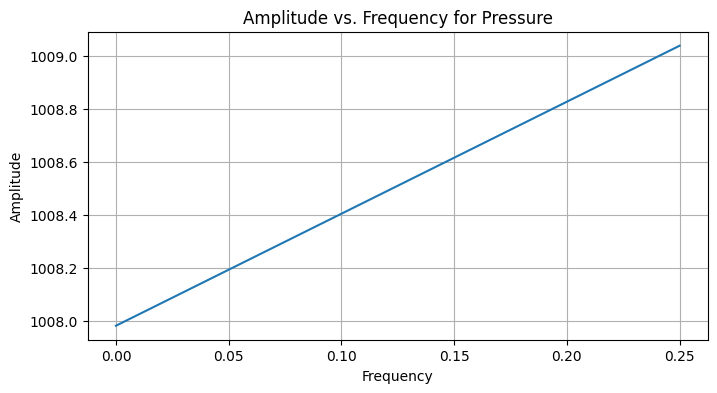

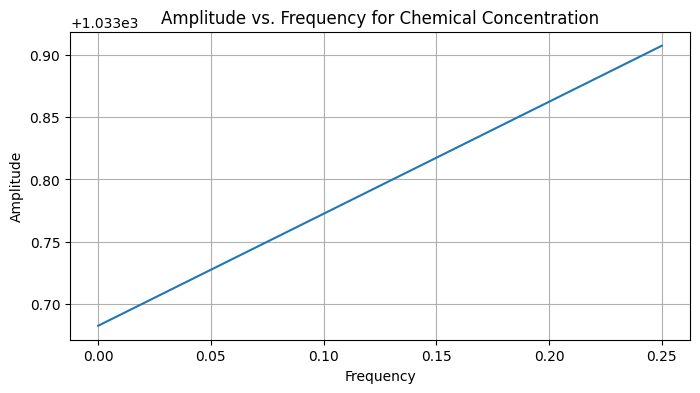

In [24]:
# Extract amplitude information
amplitudes = np.abs(fourier_transformed_data)
# Frequency information
n_samples = len(amplitudes[0])
frequencies = np.fft.fftfreq(n_samples)

# Plot amplitude vs. frequency for each variable
for i, variable in enumerate(ninja_data.columns[1:]):  # Exclude 'Time' column
    plt.figure(figsize=(8, 4))
    plt.plot(frequencies[:n_samples//2], amplitudes[:n_samples//2, i+1])  # Skip 'Time' column
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'Amplitude vs. Frequency for {variable}')
    plt.grid(True)
    plt.show()

Findings:

Descriptive Statistics: The descriptive statistics revealed that all variables have been successfully normalized, with mean values close to zero and standard deviations of approximately 1. This normalization process allows for better comparison and analysis of the variables.

Correlation Analysis: The correlation matrix showed strong negative correlation between 'Time' and 'Temperature', indicating that as time progresses, temperature tends to decrease. Other correlations were close to zero, suggesting weak linear relationships between the variables.

Inferential Statistics: Hypothesis testing confirmed the strong negative correlation between 'Time' and 'Temperature', with a very small p-value indicating statistical significance. This provides evidence supporting the existence of a significant relationship between these variables.

About how these insights can be applied in practical scenarios or how they align with theoretical knowledge: such correlations are continuously studied by materials scientists, technologists and chemists. In real life, we study technological parameters and their correlations: time, temperature, pressure. Usually they are correlated, so that when temperature increases, pressure can be reduced and time can be shortened. To carry out a reaction, usually when temperature and pressure increase - the reaction rate increases (i.e. the time required for the reaction becomes shorter).

Reflection on the Process:

The data transformations, including normalization and Fourier transformation, provided valuable insights into the nature of the dataset and uncovered hidden patterns and relationships.
Statistical analyses, such as correlation analysis and hypothesis testing, helped validate these findings and provided statistical evidence supporting the observed relationships.
Overall, the analysis of the dataset has provided actionable insights that can be applied in various domains, from climate science to manufacturing, demonstrating the power of data analysis in uncovering meaningful patterns and informing decision-making processes.